# Exploratory Data Analysis

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from matplotlib import rcParams
import statsmodels
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from utils import *

%matplotlib inline

plt.rc('figure', figsize=(15.0, 8.0))
# from jupyterthemes import jtplot
# jtplot.style(grid=False, figsize=(20,10))
# jtplot.reset()

In [2]:
data = pd.read_csv('SLDC_Data/2017/10/01-10-2017.csv')


In [3]:
data.head()

,time,value
0,00:00,4019.64
1,00:05,3992.69
2,00:10,3982.11
3,00:15,3944.66
4,00:20,3949.66


In [4]:
data['date'] = '01-10-2017'
data = extract_dt(data)

In [5]:
data.head()

,time,value,date,datetime,hour
0,00:00:00,4019.64,01-10-2017,00:00:00,0
1,00:05:00,3992.69,01-10-2017,00:05:00,0
2,00:10:00,3982.11,01-10-2017,00:10:00,0
3,00:15:00,3944.66,01-10-2017,00:15:00,0
4,00:20:00,3949.66,01-10-2017,00:20:00,0


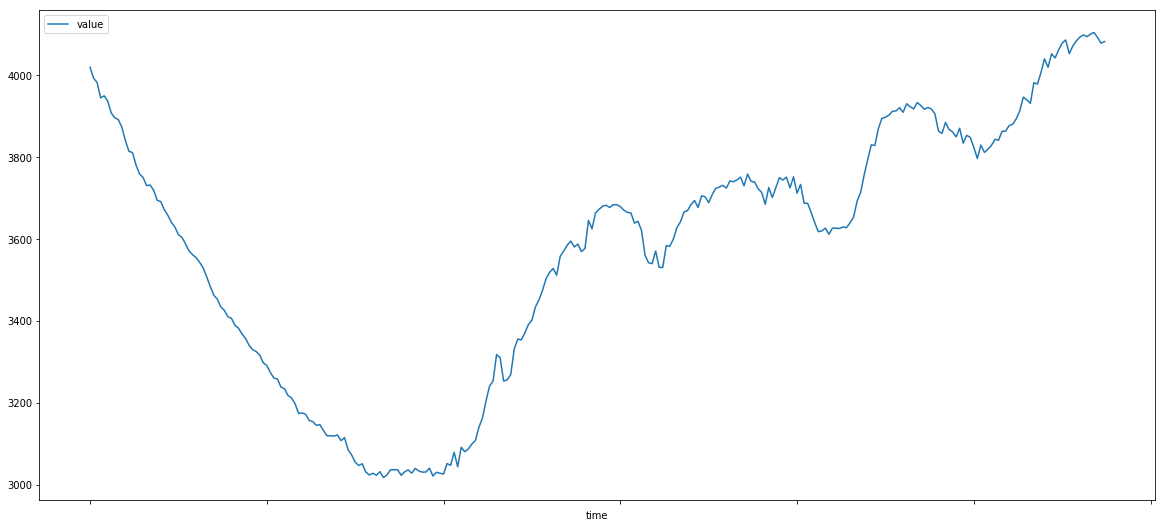

In [6]:
data.plot(x='time', y='value', subplots=True, figsize=(20, 10)); plt.legend(loc='best');

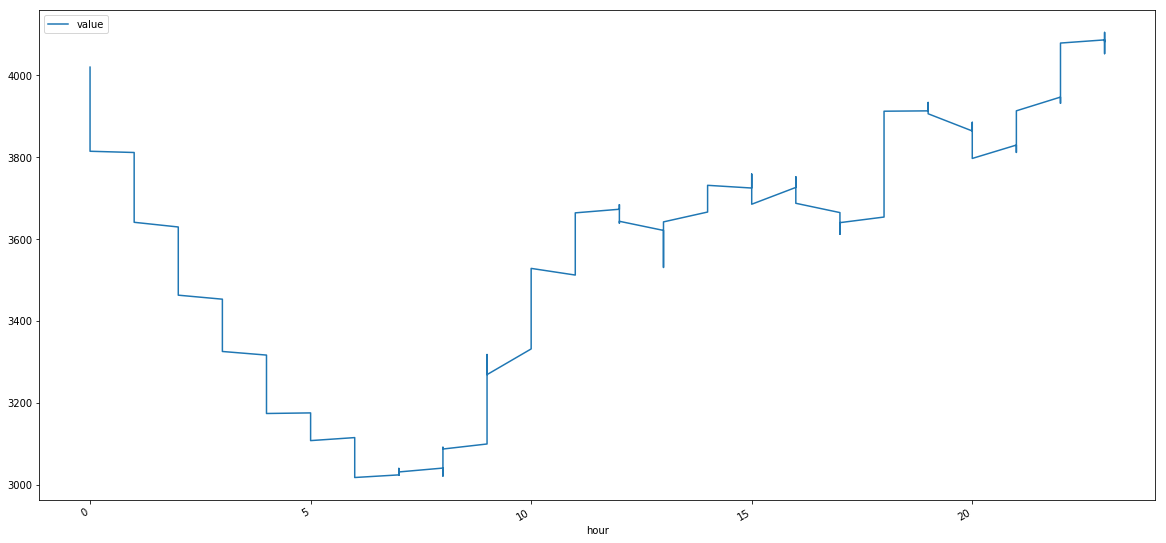

In [7]:
data.plot(x='hour', y='value', subplots=True, figsize=(20, 10)); plt.legend(loc='best');

### Comparing curves

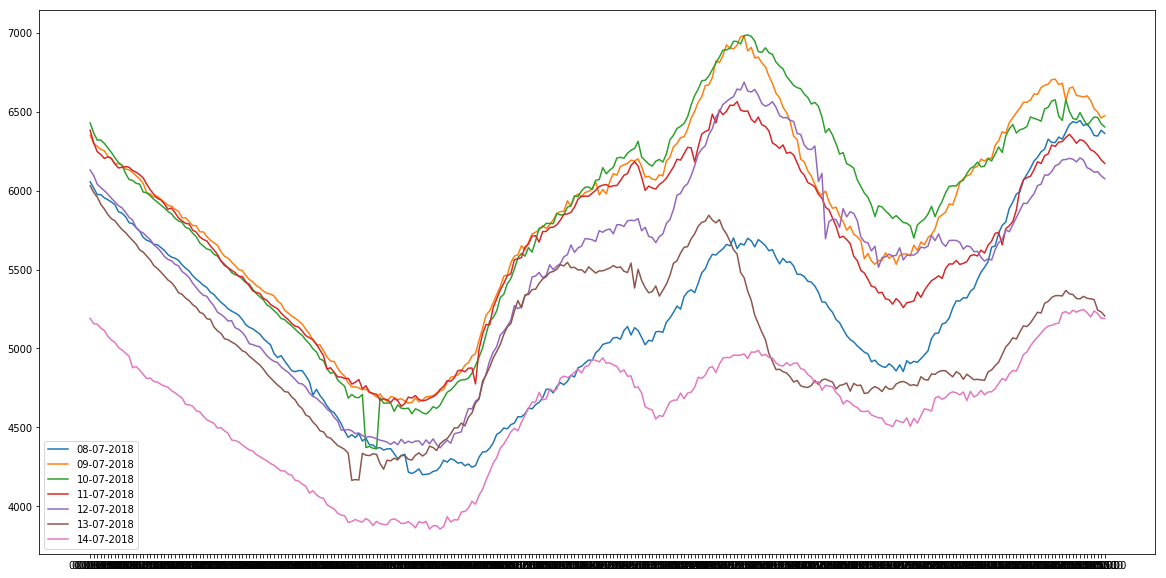

In [8]:
day_range = list(range(8, 15))
plot_curves(day_range, 7, 2018)

## Analysing the trend in the dataset

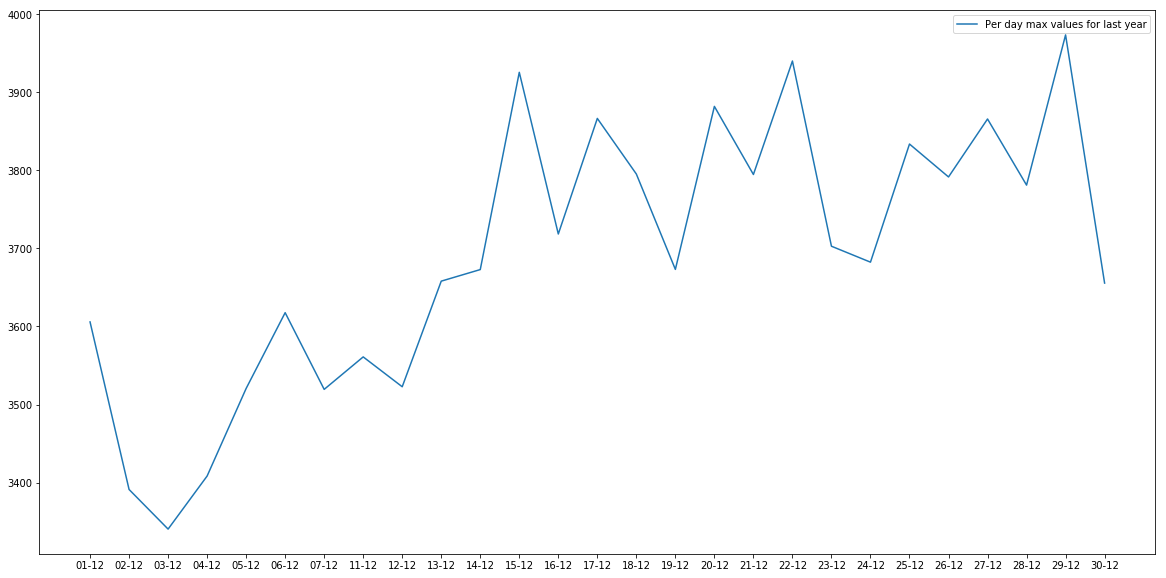

In [9]:
# plotting the maximum values of each daay
day_range = list(range(1, 31))
month_range = list(range(12, 13))
year_range = [2017]
dates = []
values = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.append(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'].max())
                dates.append('%02d-%02d' % (day, month))
            except:
                pass
        
fig = plt.figure(figsize=(20, 10))

plt.plot(dates, values);
plt.legend(['Per day max values for last year'])
plt.show()

## plot of whole of our data

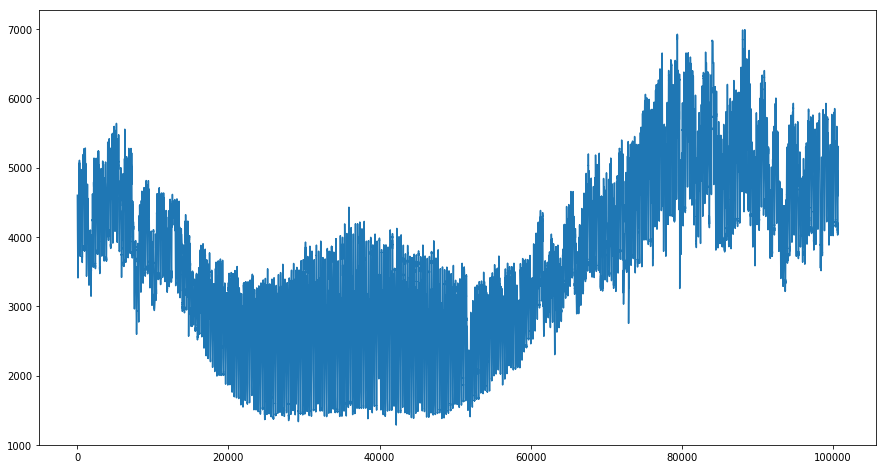

In [52]:
day_range = list(range(1, 31))
month_range = list(range(1,13))
year_range = [2017, 2018]
dates = []
values = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.extend(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'])
#                 dates.append('%02d-%02d' % (day, month))
            except:
                pass
values = pd.Series(values)
values.plot()

{8, 9, 10, 11, 12}


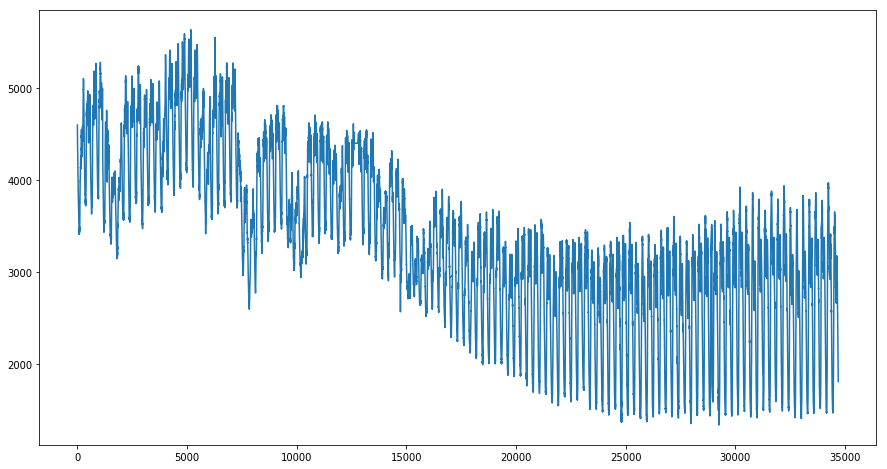

In [53]:
day_range = list(range(1, 31))
month_range = list(range(1,13))
year_range = [2017]
dates = []
values = []
months = set()
for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.extend(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'])
                months.add(month)
#                 dates.append('%02d-%02d' % (day, month))
            except:
                pass
print(months)
values = pd.Series(values)
values.plot()

{1, 2, 3, 4, 5, 6, 7, 8}


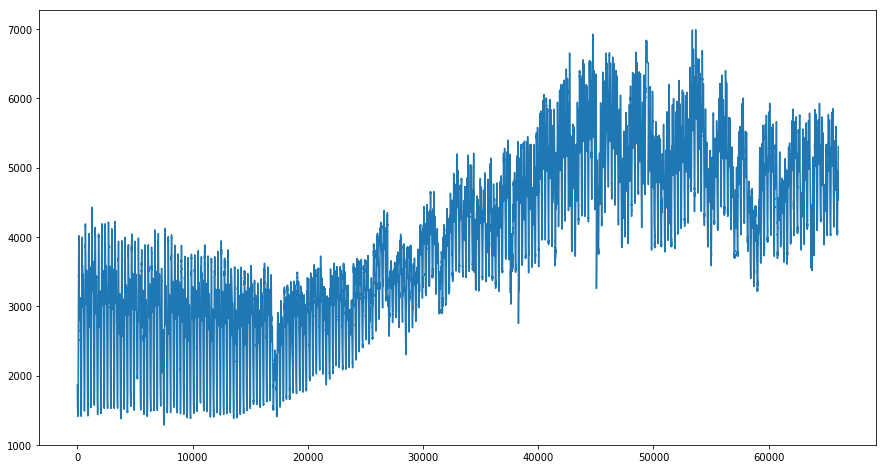

In [54]:
day_range = list(range(1, 31))
month_range = list(range(1,13))
year_range = [2018]
dates = []
values = []
months = set()
for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.extend(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'])
                months.add(month)
#                 dates.append('%02d-%02d' % (day, month))
            except:
                pass
print(months)
values = pd.Series(values)
values.plot()

Not all values present for date:  18-05-2018
Not all values present for date:  23-08-2018


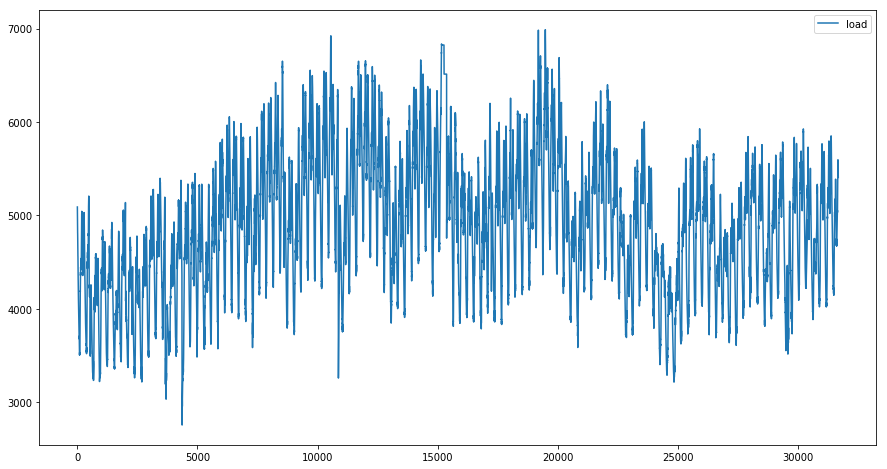

In [55]:
day_range = list(range(1, 31))
month_range = list(range(5,13))
year_range = [2018]
datetime = []
values = []
dates = []
months = set()
for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                load_values = pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value']
                if len(load_values) != 288:
                    print('Not all values present for date: ', date)
                    continue
                values.extend(load_values)
                dates.extend([date]*len(load_values))
                months.add(month)
#                 dates.append('%02d-%02d' % (day, month))
#                 lol()
            except:
                pass
# print(months)
data = {'date': dates, 'load': values}
data = pd.DataFrame(data)
data.plot()

In [56]:
data.head()

,date,load
0,01-05-2018,5089.27
1,01-05-2018,5049.60
2,01-05-2018,5019.19
3,01-05-2018,4984.80
4,01-05-2018,4969.09



### log detrending

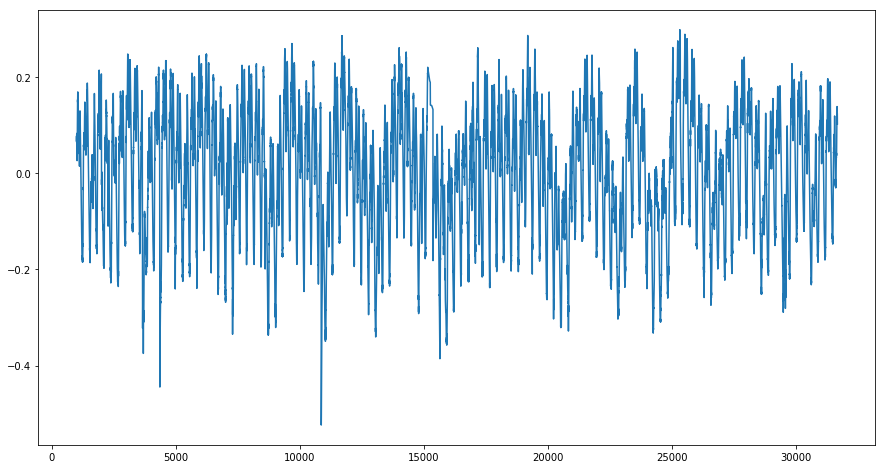

In [57]:
log_values = data.load.apply(lambda x: np.log(x))
rolled_values = log_values.rolling(window=1000).mean()
log_detrended = log_values - rolled_values
log_detrended.plot()

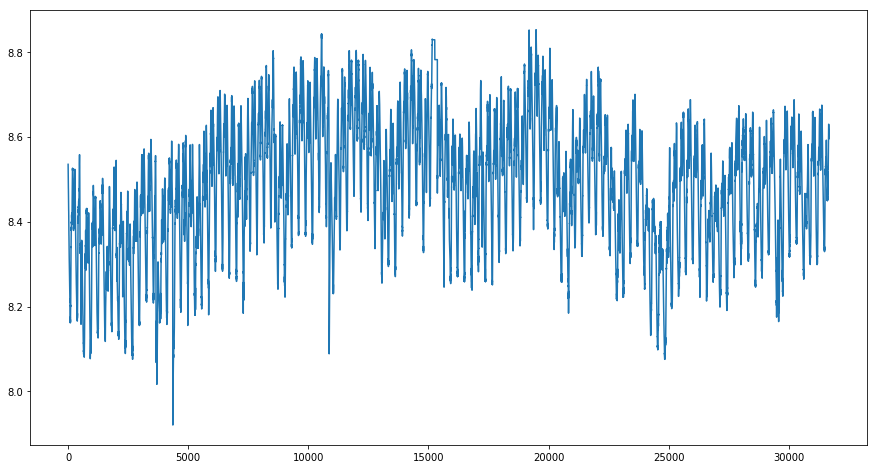

In [58]:
log_values.plot()

In [59]:
log_detrended.isna().sum()  # 999 NaNs because of rolling window size of 1000`

999

In [60]:
# next more formally apply the Augmented Dickey-Fuller test
log_detrended = log_detrended.dropna()
adfuller(log_detrended, autolag = 'AIC', regression = 'ct')

(-16.502030124635084,
 0.0,
 50,
 30630,
 {'1%': -3.9590655934787033,
  '5%': -3.4106333462309255,
  '10%': -3.1271344181575644},
 -216552.88967809896)

In [61]:
?seasonal_decompose

In [62]:
# make the length of log_values multiple of 288
print(int(len(log_values)/288) * 288, len(log_values))
log_values = log_values[:int(len(log_values)/288) * 288]
print(len(log_values))

31680 31680
31680


### Plotting decompostion plots

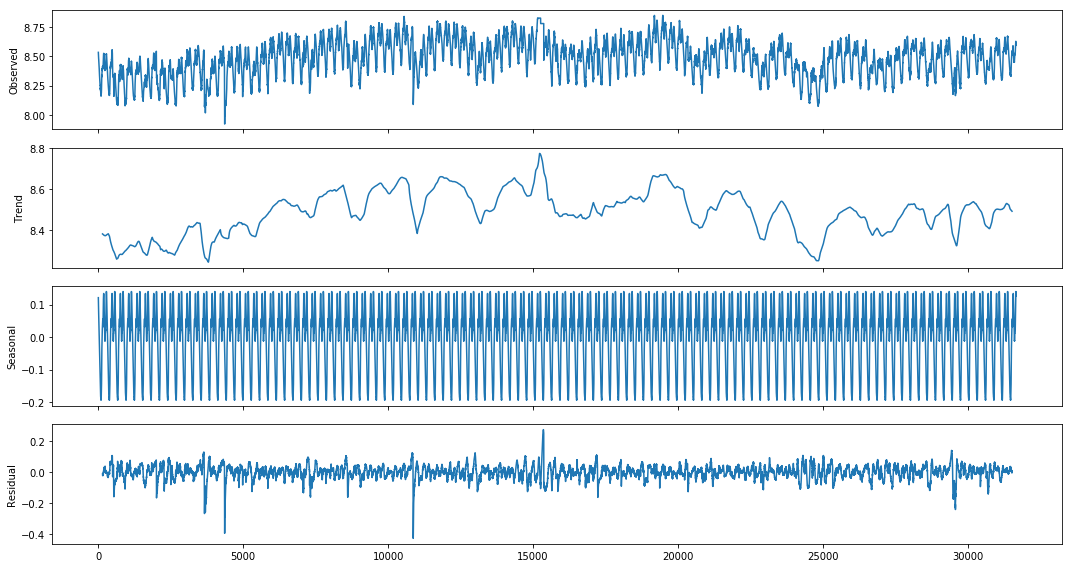

In [63]:
log_values.interpolate(inplace = True)
decomposition = seasonal_decompose(log_values, freq=288, model = 'additive')
decomposition.plot();

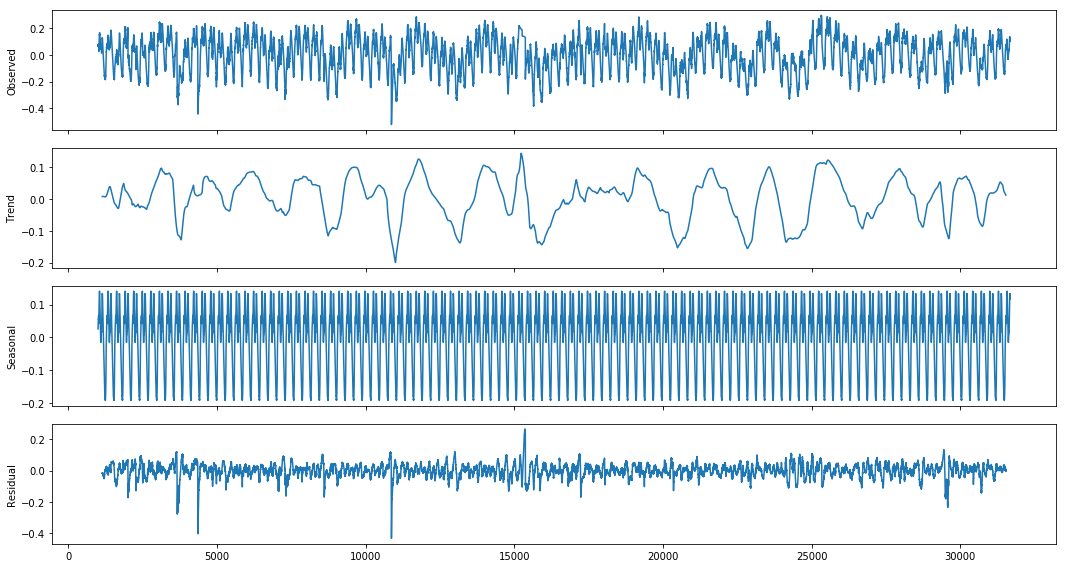

In [64]:
# log_values.interpolate(inplace = True)
decomposition = seasonal_decompose(log_detrended, freq=288, model = 'additive')
decomposition.plot();

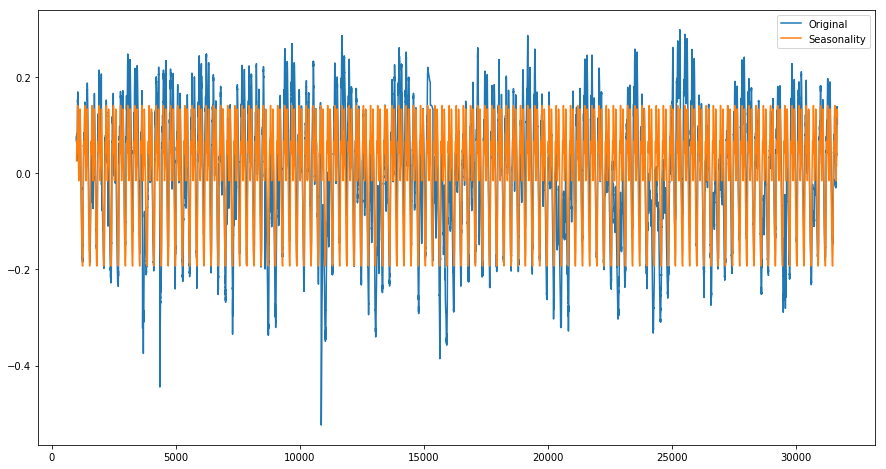

In [65]:
plt.plot(log_detrended, label='Original')
# plt.plot(decomposition.trend, label='Trend')
plt.plot(decomposition.seasonal,label='Seasonality')
# plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc = 'best')

In [66]:
(len(log_detrended) / 288) / 7

15.21875

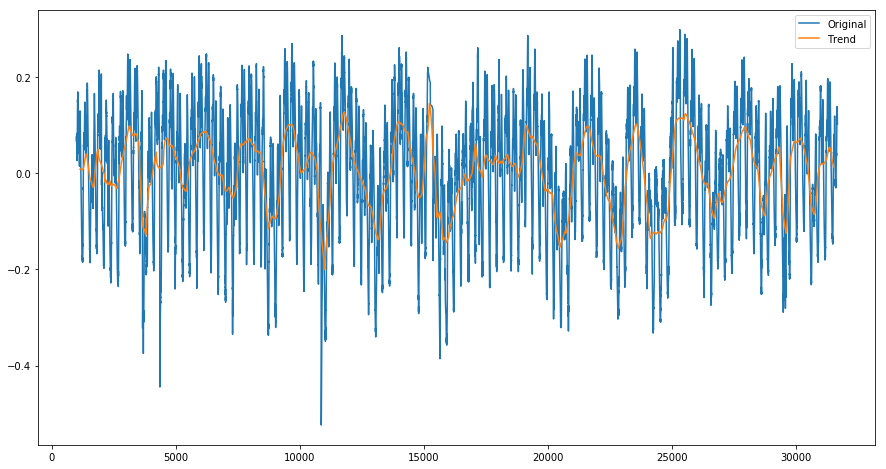

In [67]:
plt.plot(log_detrended, label='Original')
plt.plot(decomposition.trend, label='Trend')
# plt.plot(decomposition.seasonal,label='Seasonality')
# plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc = 'best')

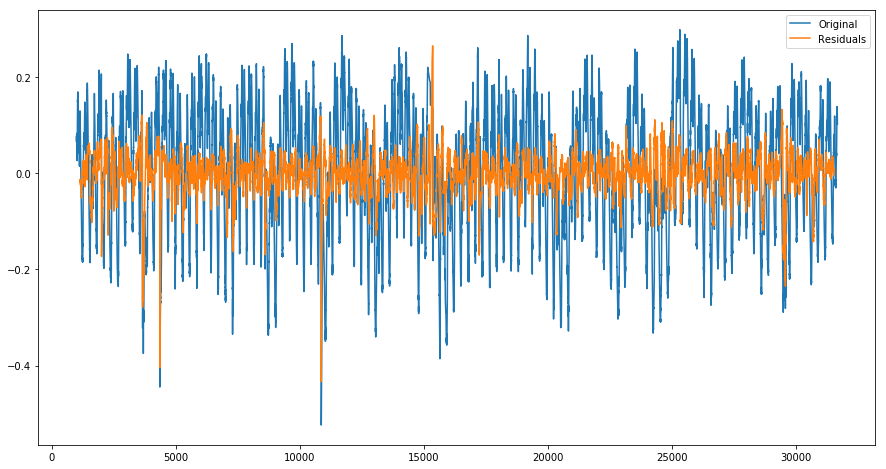

In [68]:
plt.plot(log_detrended, label='Original')
# plt.plot(decomposition.trend, label='Trend')
# plt.plot(decomposition.seasonal,label='Seasonality')
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc = 'best')

## Decomposition without log detrending

Not all values present for date:  18-05-2018
Not all values present for date:  23-08-2018


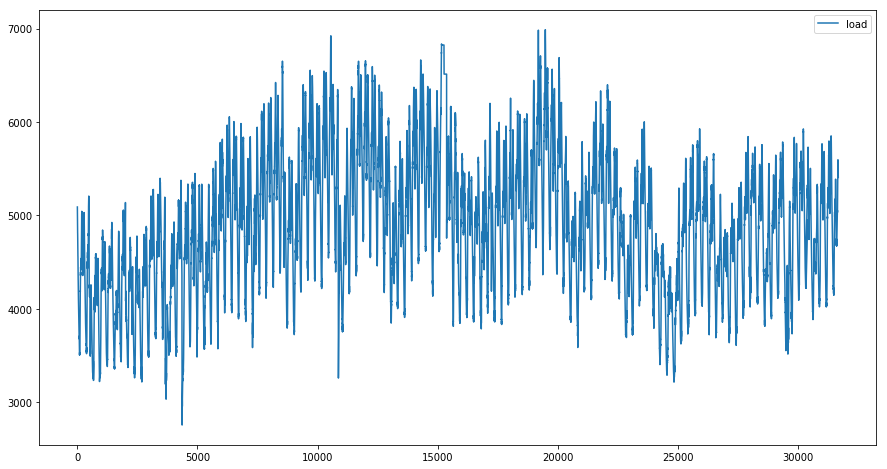

In [69]:
day_range = list(range(1, 31))
month_range = list(range(5,13))
year_range = [2018]
datetime = []
values = []
dates = []
months = set()
for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                load_values = pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value']
                if len(load_values) != 288:
                    print('Not all values present for date: ', date)
                    continue
                values.extend(load_values)
                dates.extend([date]*len(load_values))
                months.add(month)
#                 dates.append('%02d-%02d' % (day, month))
#                 lol()
            except:
                pass
# print(months)
pd.DataFrame({'date': dates, 'load': values}).plot()


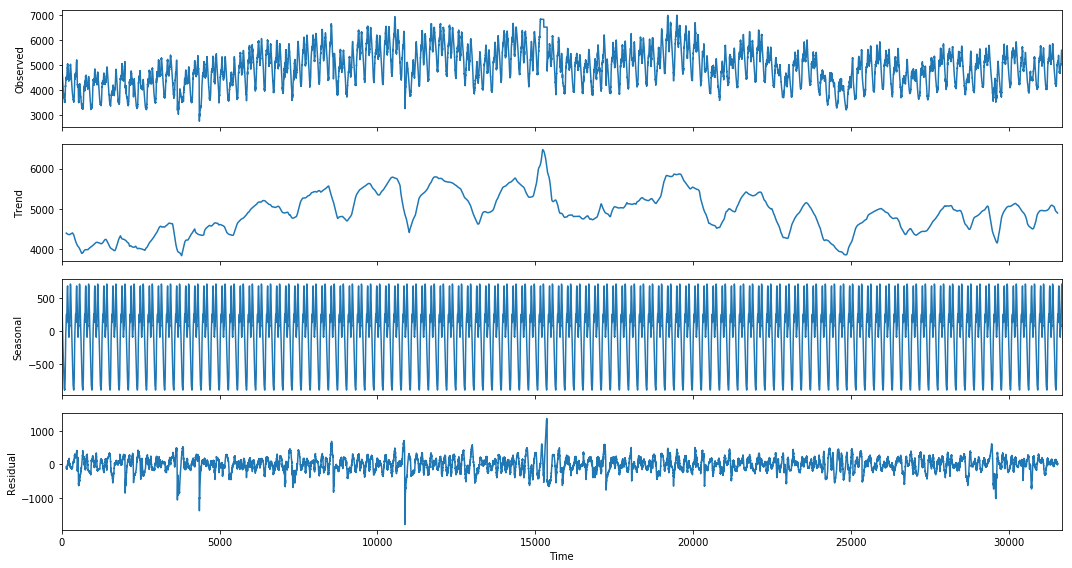

In [70]:
decomposition = seasonal_decompose(values, freq=288, model = 'additive')
decomposition.plot();

## looking after weekly patterns

Not all values present for date:  23-08-2018
30-08-2018


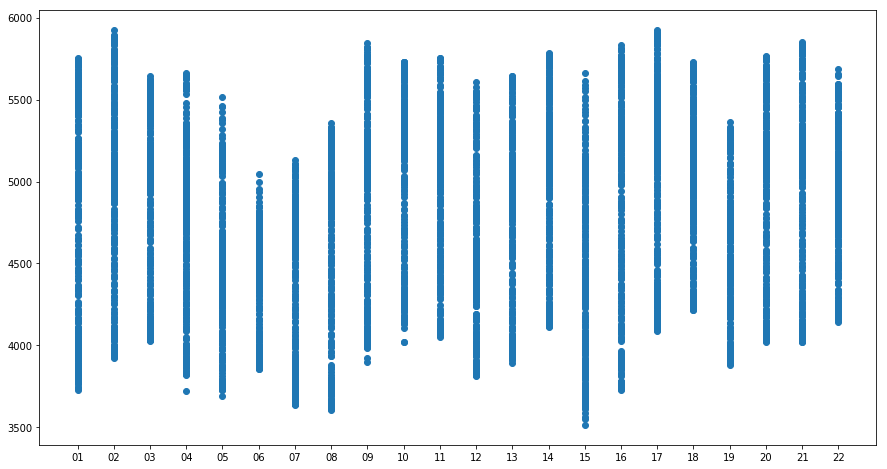

In [71]:
day_range = list(range(1, 31))
month_range = list(range(8, 9))
year_range = [2018]
datetime = []
values = []
dates = []
months = set()
for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                load_values = pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value']
                if len(load_values) != 288:
                    print('Not all values present for date: ', date)
                    continue
                values.extend(load_values)
                dates.extend([date[:2]]*len(load_values))
#                 print(date)
                months.add(month)
#                 dates.append('%02d-%02d' % (day, month))
#                 lol()
            except:
                pass
print(date)
df = pd.DataFrame({'date': dates, 'load': values})
plt.scatter(df['date'], df['load'])

Note: there's a dip during the weekends

## Forecasting

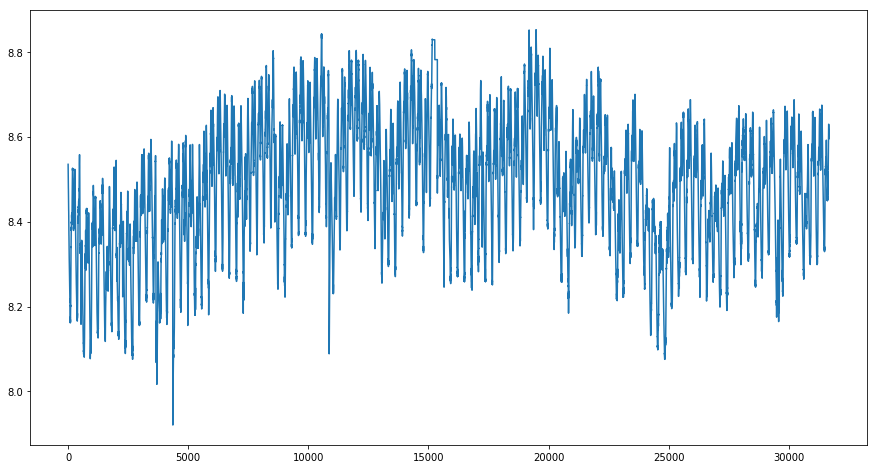

In [72]:
log_values.plot()

In [73]:
log_values_diff = log_values - log_values.shift()  # diff of one, removes trend

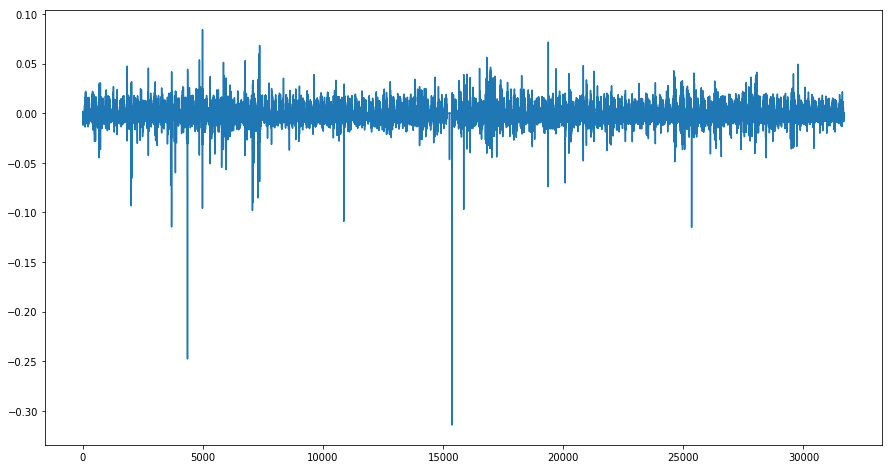

In [74]:
plt.plot(log_values_diff)

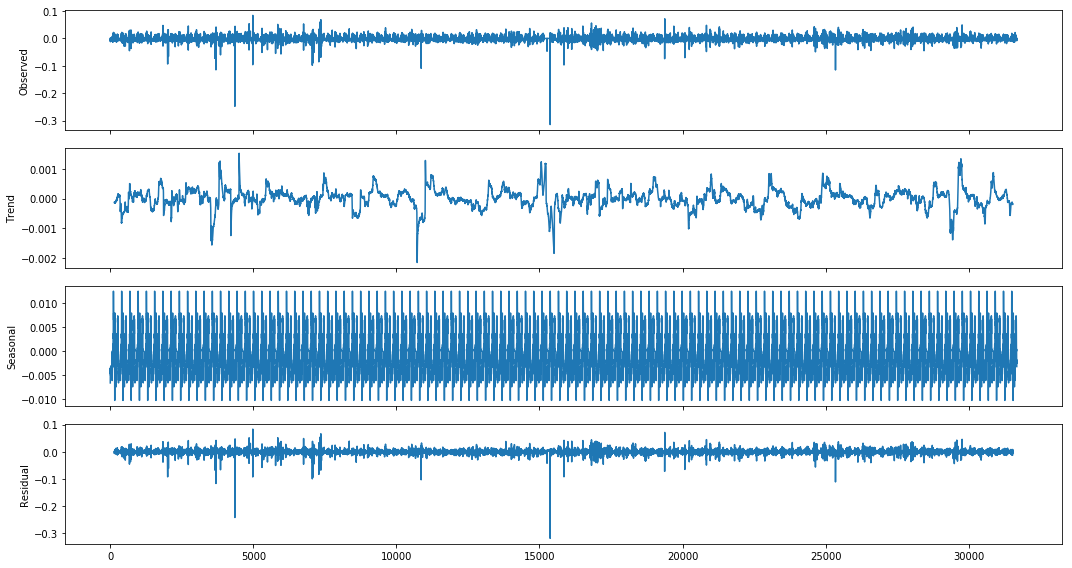

In [75]:
decomposition = seasonal_decompose(log_values_diff.dropna(), freq=288, model = 'additive')
decomposition.plot();

In [76]:
%%time
lag_pacf = pacf(log_values_diff.dropna().values, nlags = 600)

CPU times: user 2min 43s, sys: 12min 39s, total: 15min 22s
Wall time: 14.6 s


In [77]:
%%time
lag_acf = acf(log_values_diff.dropna().values, nlags = 1000)

CPU times: user 1.13 s, sys: 6.44 s, total: 7.57 s
Wall time: 354 ms


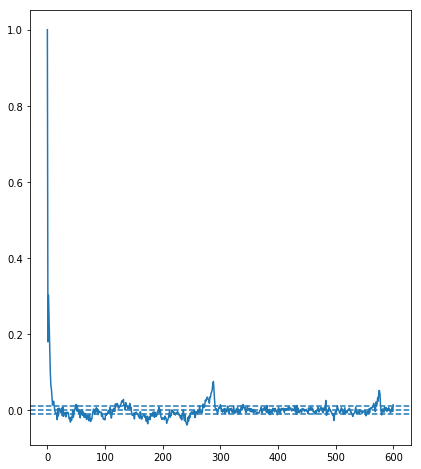

In [78]:
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_values_diff)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_values_diff)), linestyle='--')

In [79]:
np.where(lag_pacf > 1.96/np.sqrt(len(log_values_diff)))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  49,
         50,  52, 118, 120, 121, 122, 127, 128, 129, 130, 131, 132, 134,
        136, 137, 143, 270, 273, 274, 275, 276, 277, 278, 279, 280, 281,
        282, 283, 284, 285, 286, 287, 288, 289, 290, 300, 339, 340, 381,
        429, 433, 483, 566, 570, 571, 572, 573, 574, 575, 576, 577, 600]),)

In [80]:
np.where(lag_pacf > 0.05)

(array([  0,   1,   2,   3,   4,   5,   6,   7, 286, 287, 288, 289, 576]),)

In [81]:
5 * 1.96/np.sqrt(len(log_values_diff))  

0.05505965543449811

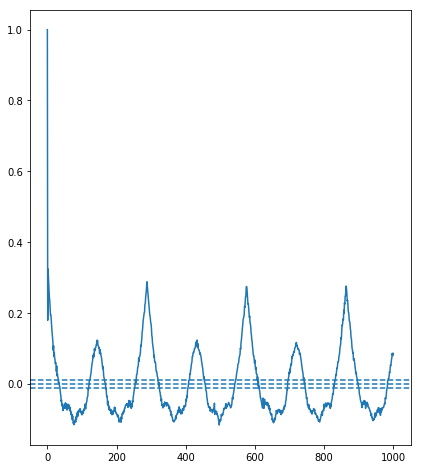

In [82]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_values_diff)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_values_diff)), linestyle='--')

# critical value determination: https://stats.stackexchange.com/a/185553/181916

In [83]:
np.where(lag_acf > 1.96/np.sqrt(len(log_values_diff)))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,  123,
         124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
         135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,
         146,  147,  148,  149,  150,  151,  152,  153,  154,  155,  156,
         157,  158,  159,  160,  161,  162,  163,  164,  165,  257,  258,
         259,  260,  261,  262,  263,  264,  265,  266,  267,  268,  269,
         270,  271,  272,  273,  274,  275,  276,  277,  278,  279,  280,
         281,  282,  283,  284,  285,  286,  287,  288,  289,  290,  291,
         292,  293,  294,  295,  296,  297,  298,  299,  300,  301,  302,
         303,  304,  305,  306,  307,  308,  309,  310,  311,  312,  313,
         314,  315,  316,  317,  318,  319,  411,  412,  413,  414,  415,
         416,  417,  418,  419,  420, 

In [84]:
np.where(lag_acf > 0.05)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,  129,  130,  131,  132,  133,  134,  135,
         136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  155,  156,  157,
         158,  159,  263,  264,  265,  266,  267,  268,  269,  270,  271,
         272,  273,  274,  275,  276,  277,  278,  279,  280,  281,  282,
         283,  284,  285,  286,  287,  288,  289,  290,  291,  292,  293,
         294,  295,  296,  297,  298,  299,  300,  301,  302,  303,  304,
         305,  306,  307,  308,  309,  310,  311,  312,  313,  416,  417,
         418,  419,  420,  421,  422,  423,  424,  425,  426,  427,  428,
         429,  430,  431,  432,  433,  434,  435,  436,  437,  438,  439,
         440,  441,  442,  443,  444,  445,  446,  447,  551,  552,  553,
         554,  555,  556,  557,  558, 

## TODO: try nlags=2000 ~

In [85]:
# AR model
model = ARIMA(log_values, order=(288, 1, 0))  
results_AR = model.fit(disp=-1)  

In [ ]:
plt.plot(log_values_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_values_diff)**2))